<a href="https://colab.research.google.com/github/fcarcamo03/PROG/blob/main/metodo2_variabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
options(repr.plot.width=12, repr.plot.height=10)

In [42]:
install.packages("dplyr")
install.packages("ggplot2")
library("dplyr")
library("ggplot2")

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in install.packages("ggplot2"):
“installation of package ‘ggplot2’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [43]:
#carga archivo
datosPaises <- read.csv("https://raw.githubusercontent.com/fcarcamo03/PROG/main/CONTROL%201/DatosPaises.csv", sep = ";", header = TRUE)
head(datosPaises)

,PAIS,PIB,POB,IDH,GINI,IPC,FAO,GENERO,ELECTRICIDAD,ESCOLARIDAD,⋯,TURISMO,INTERNET,VIOLENCIA,VIDA,CELULAR,DESERCION,PRISION,RENOVABLE,PARLAMENTO,INMIGRANTES
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Qatar,127.54265,2.169,0.8498,29.95,107.07,1.75,0.524,98,13.79,⋯,2.611,91.49,38.3,78.2,145.76,2.26,60,0.00,0.00,73.82
2,Luxembourg,87.77164,0.543,0.8919,29.00,108.01,1.27,0.100,100,13.88,⋯,0.945,94.67,39.5,81.7,148.37,5.60,122,3.98,28.33,43.25
3,Kuwait,82.36923,3.250,0.8163,29.00,111.19,2.60,0.387,98,14.75,⋯,0.300,78.70,39.5,74.4,218.43,5.93,137,0.00,1.54,60.21
4,Singapore,76.24004,5.399,0.9118,29.95,112.65,1.02,0.088,100,15.40,⋯,11.900,82.00,9.2,83.0,158.13,1.32,230,2.79,25.25,42.93
5,Brunei,69.44976,0.418,0.8556,29.00,102.88,2.95,0.064,76,14.53,⋯,0.225,68.77,39.5,78.8,110.06,3.63,122,0.00,23.17,49.35
6,Norway,62.45083,5.084,0.9439,26.83,104.19,1.51,0.067,100,17.49,⋯,4.963,96.30,26.8,81.6,116.51,1.51,72,47.75,39.64,13.77


In [44]:
#INTERNET sin datos atipicos

va_inf = mean(datosPaises$INTERNET) - ( 4*sd(datosPaises$INTERNET) )
va_sup = mean(datosPaises$INTERNET) + ( 4*sd(datosPaises$INTERNET) )

datosPaises <- datosPaises %>%
  mutate(
    outlier = ifelse( INTERNET > va_inf & INTERNET < va_sup , "No outlier", "Outlier")
  )

In [45]:
# datos outleirs
datosPaises %>%
 filter( outlier == "Outlier")


Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


PAIS,PIB,POB,IDH,GINI,IPC,FAO,GENERO,ELECTRICIDAD,ESCOLARIDAD,⋯,INTERNET,VIOLENCIA,VIDA,CELULAR,DESERCION,PRISION,RENOVABLE,PARLAMENTO,INMIGRANTES,outlier
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


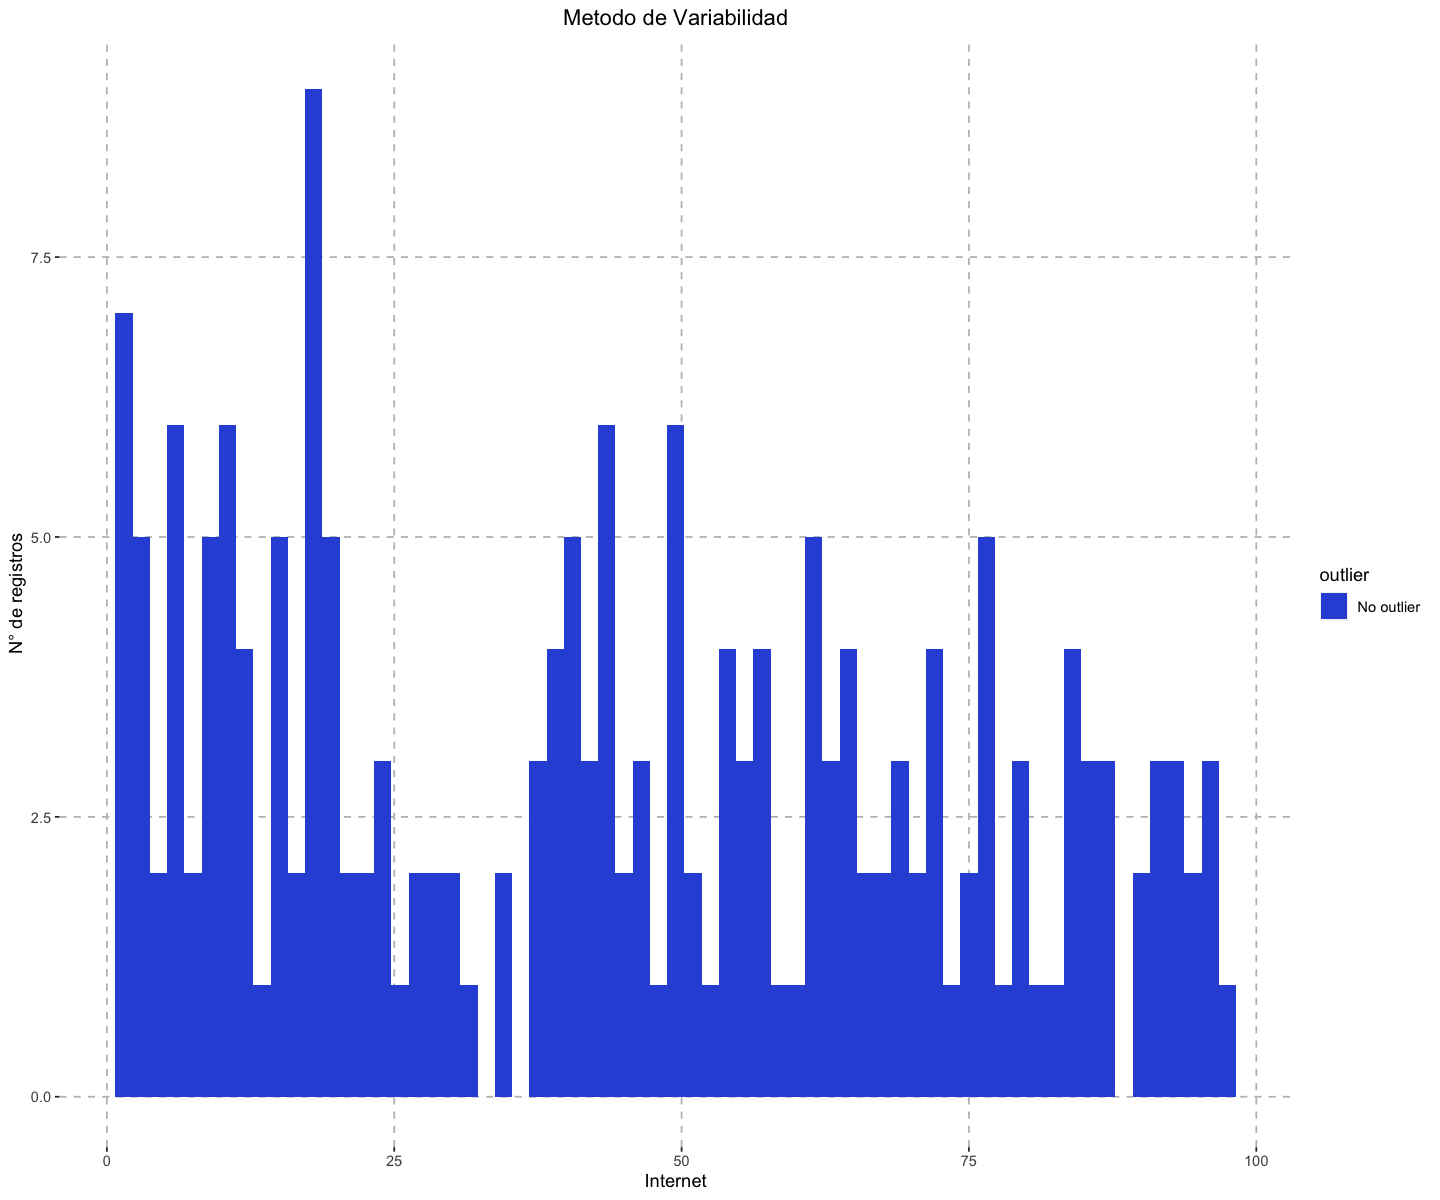

In [50]:
grafico_variabilidad <- datosPaises %>%
  ggplot() +
  aes(x = INTERNET, fill = outlier) +
  geom_histogram(binwidth = 1.5) +
  scale_fill_manual(values = c("No outlier" = "#3057D9", "Outlier" = "#4AF0BF"))+
  theme(panel.background = element_rect(fill = "white"),
        panel.grid.major = element_line(color = "gray", linetype = "dashed"))+
  ggtitle(label = "Metodo de Variabilidad")+
  xlab("Internet") +
  ylab("N° de registros")+
  theme(plot.title = element_text(hjust = 0.5))

ggsave("internet_variabilidad.svg.png", plot = grafico_variabilidad, width = 8, height = 6, dpi = 300)

grafico_variabilidad

In [47]:
#ggplot(datosPaises, aes(x = PIB, y = INTERNET)) +
 # geom_point() +
  #geom_smooth(method = "lm")

#ggplot(datosVar, aes(x = PIB, y = INTERNET)) +
 # geom_point() +
  #geom_smooth(method = "lm")

In [48]:
mean(datosPaises$INTERNET)
mean(datosVar$INTERNET)

sd(datosPaises$INTERNET)
sd(datosVar$INTERNET)

cor(datosPaises$PIB,datosPaises$INTERNET)
cor(datosVar$PIB,datosVar$INTERNET)

[1] 44.11293

[1] 44.11293

[1] 28.92764

[1] 28.92764

[1] 0.766723

[1] 0.766723